In [97]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

Class distribution: [35 35 35]
Class distribution in iris training set: [35 35 35]


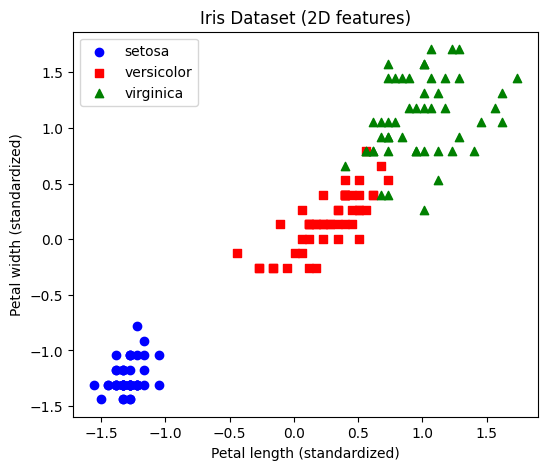

Class distribution in moons training set: [35 35]


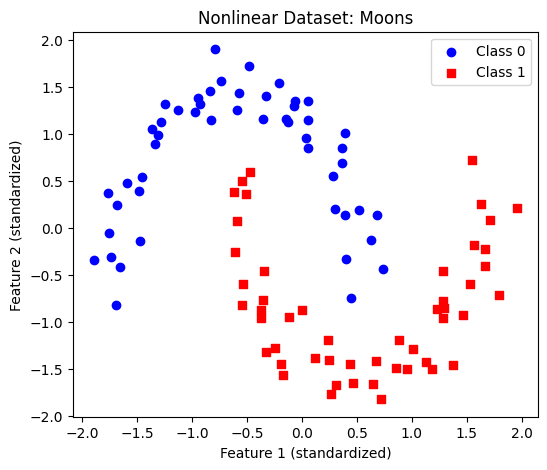

In [98]:
# Exercise 1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))

#Tasks


print("Class distribution in iris training set:", np.bincount(y_train))

# Plot Iris
plt.figure(figsize=(6, 5))
for lab, marker, color in zip(range(3), ('o', 's', '^'), ('blue', 'red', 'green')):
    plt.scatter(X_combined_std[y_combined == lab, 0],
                X_combined_std[y_combined == lab, 1],
                label=iris.target_names[lab],
                marker=marker,
                color=color)
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.title("Iris Dataset (2D features)")
plt.legend()
plt.show()



# Create a nonlinear dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the moons dataset
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)

# Standardize the features
sc_moons = StandardScaler()
X_train_moons_std = sc_moons.fit_transform(X_train_moons)
X_test_moons_std = sc_moons.transform(X_test_moons)

# Combine standardized training and test sets for plotting
X_combined_moons_std = np.vstack((X_train_moons_std, X_test_moons_std))
y_combined_moons = np.hstack((y_train_moons, y_test_moons))

# Print class distribution for moons dataset
print("Class distribution in moons training set:", np.bincount(y_train_moons))
# Plot Moons
plt.figure(figsize=(6, 5))
plt.scatter(X_combined_moons_std[y_combined_moons == 0, 0],  
            X_combined_moons_std[y_combined_moons == 0, 1],  
            color="blue", marker="o", label="Class 0")
plt.scatter(X_combined_moons_std[y_combined_moons == 1, 0],  
            X_combined_moons_std[y_combined_moons == 1, 1], 
            color="red", marker="s", label="Class 1")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.title("Nonlinear Dataset: Moons")
plt.legend()
plt.show()

Accuracy: 0.9777777777777777


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


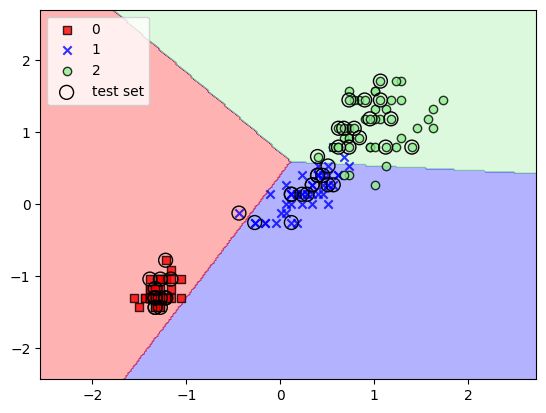


Perceptron with eta0=0.01
Accuracy: 0.956


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


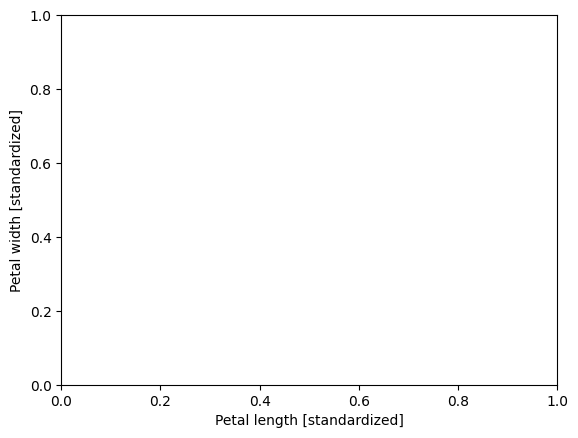

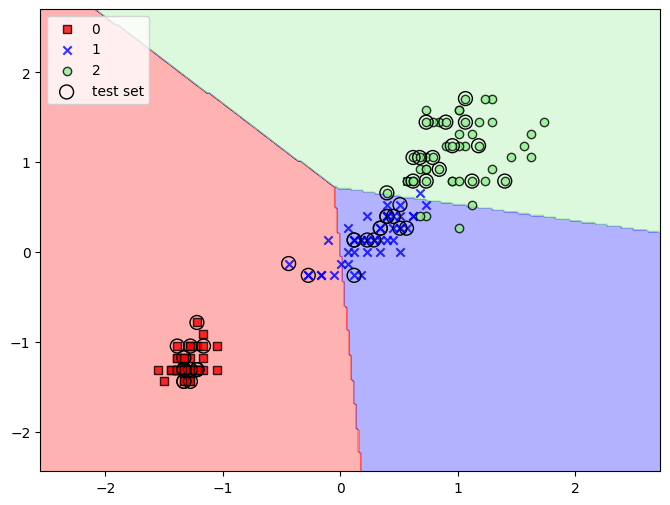

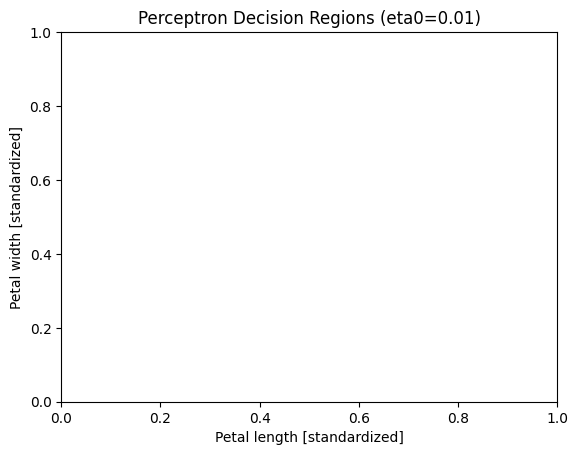


Perceptron with eta0=0.1
Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


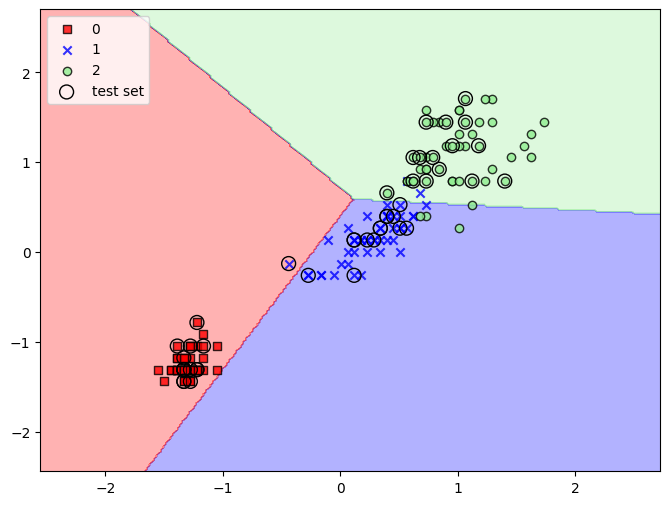

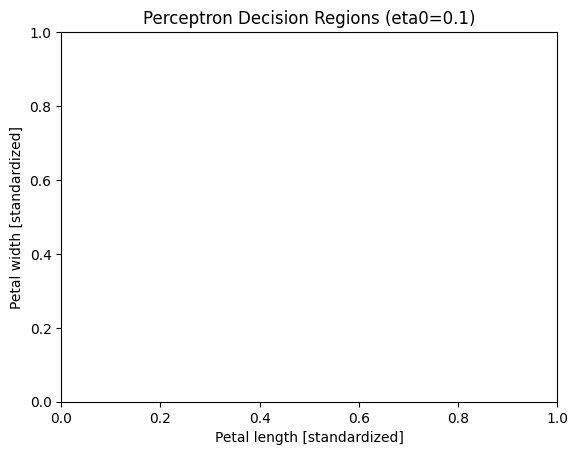


Perceptron with eta0=1
Accuracy: 0.889


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


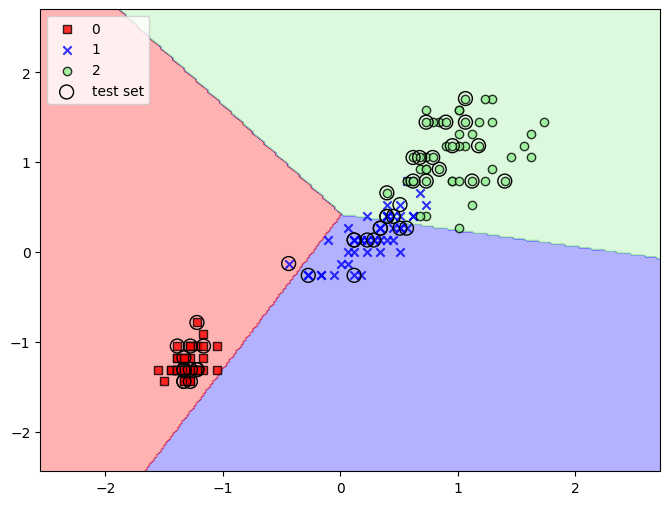

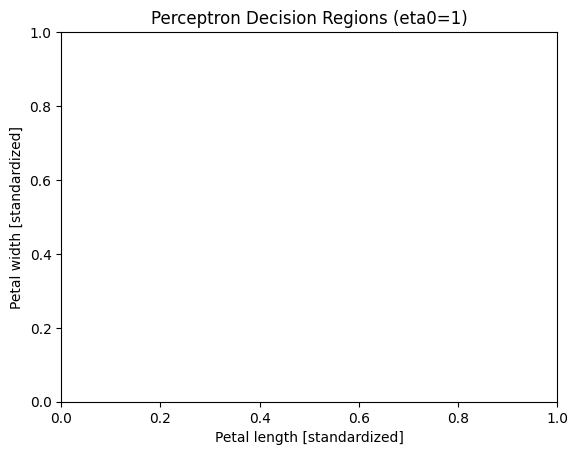

PERCEPTRON ON MOONS DATASET
Accuracy on moons dataset: 0.833


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


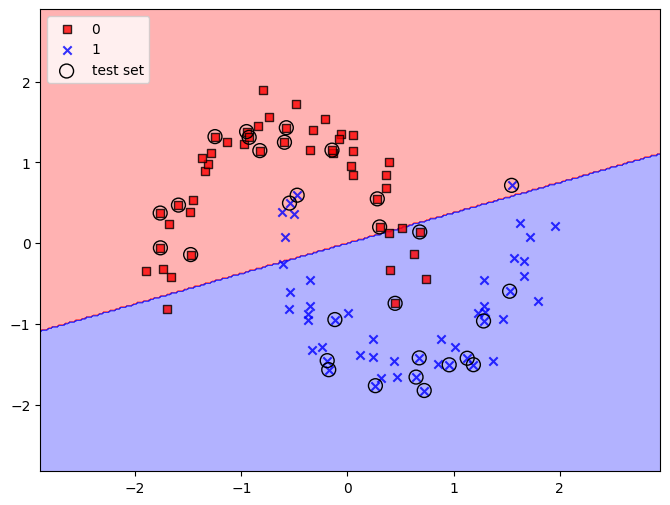

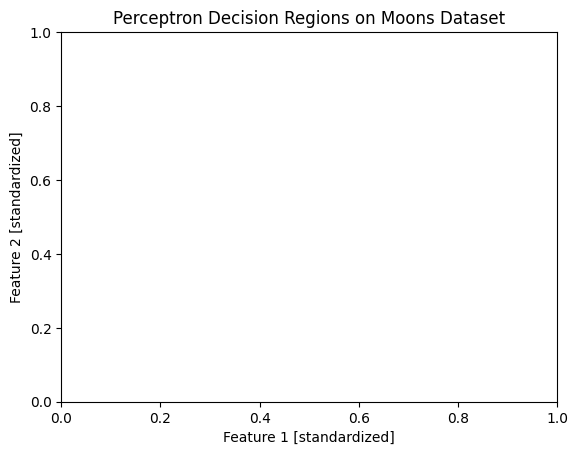

'The perceptron fails on the moon dataset because:\n1. The perceptron is a linear classifier, meaning it can only create straight-line decision boundaries.\n2. The moons dataset is non-linearly separable - the classes are arranged in interleaving half-circles.\n3. No single straight line can effectively separate these two classes, which is why the perceptron performs poorly.'

In [99]:
#Exercise2

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

#Tasks

eta_values = [0.01, 0.1, 1]

for eta in eta_values:
    print(f"\nPerceptron with eta0={eta}")
    
    # Create and train perceptron
    ppn = Perceptron(max_iter=40, eta0=eta, random_state=1)
    ppn.fit(X_train_std, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = ppn.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.3f}')
    
    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_combined_std, y_combined, classifier=ppn, 
                         test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Perceptron Decision Regions (eta0={eta})')
    plt.show()

# Try perceptron on moons dataset
print("PERCEPTRON ON MOONS DATASET")


# Create and train perceptron on moons data
ppn_moons = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_moons.fit(X_train_moons_std, y_train_moons)

# Make predictions and calculate accuracy
y_pred_moons = ppn_moons.predict(X_test_moons_std)
accuracy_moons = accuracy_score(y_test_moons, y_pred_moons)
print(f'Accuracy on moons dataset: {accuracy_moons:.3f}')

# Plot decision regions for moons dataset
plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined_moons_std, y_combined_moons, classifier=ppn_moons,
                     test_idx=range(len(X_train_moons), len(X_combined_moons_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Perceptron Decision Regions on Moons Dataset')
plt.show()


'''The perceptron fails on the moon dataset because:
1. The perceptron is a linear classifier, meaning it can only create straight-line decision boundaries.
2. The moons dataset is non-linearly separable - the classes are arranged in interleaving half-circles.
3. No single straight line can effectively separate these two classes, which is why the perceptron performs poorly.'''

c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9777777777777777
Probabilities: [[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


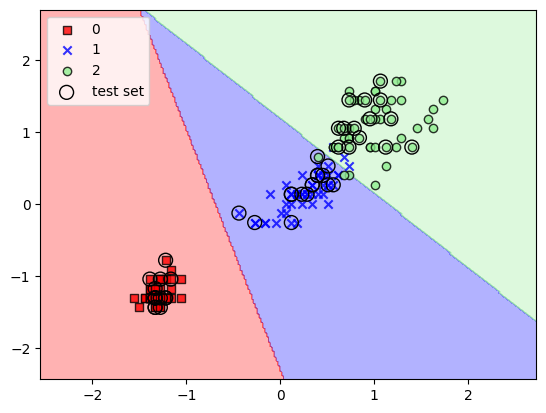

c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],



Logistic Regression with C=0.01
Accuracy: 0.689
Probabilities for first 3 test samples:
[[0.18415623 0.35370809 0.46213568]
 [0.48146488 0.30637586 0.21215926]
 [0.50097506 0.30080668 0.19821826]]


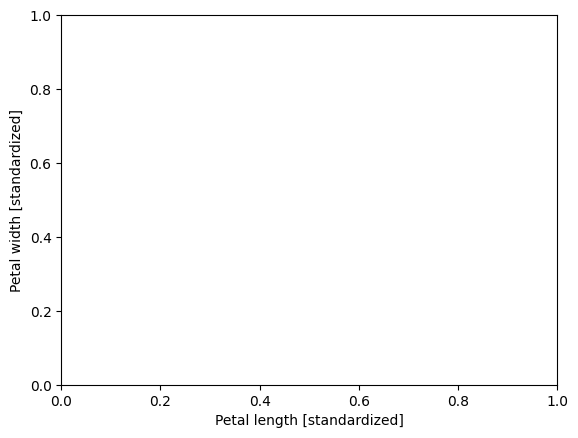

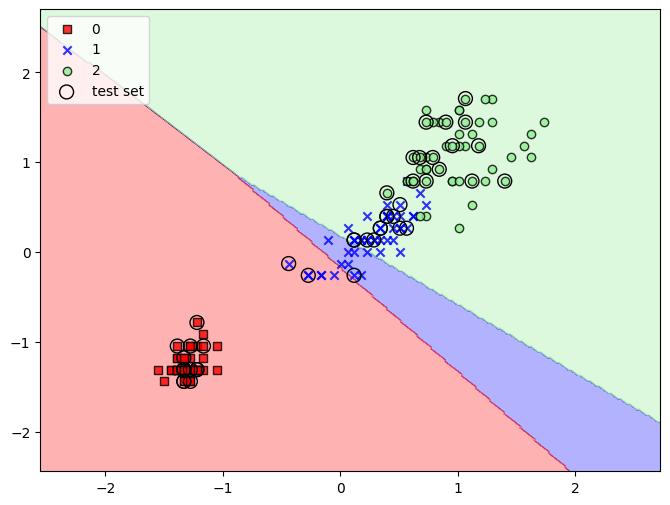

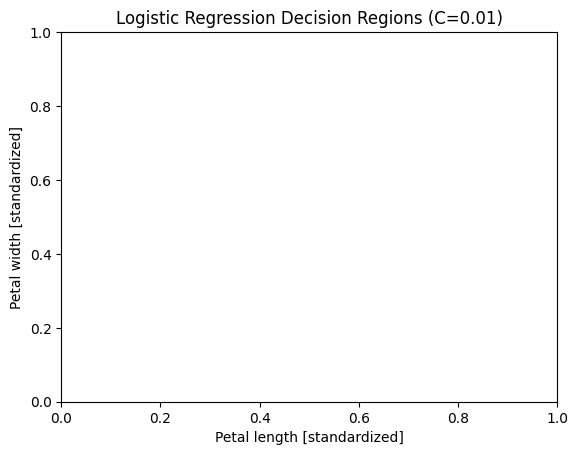

Model coefficients (C=0.01):
[[-0.31724358 -0.30082501]
 [ 0.07061863  0.03397723]
 [ 0.24901742  0.26779216]]
Intercept: [-0.75239847 -0.69492553 -0.73803492]

Logistic Regression with C=1
Accuracy: 0.978
Probabilities for first 3 test samples:
[[4.35424381e-04 2.40133856e-01 7.59430720e-01]
 [7.98498914e-01 2.01272655e-01 2.28430822e-04]
 [8.15960440e-01 1.83929887e-01 1.09672897e-04]]


c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


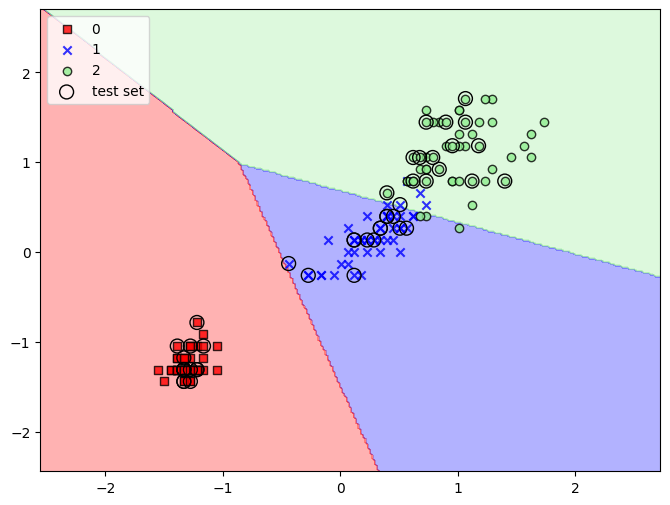

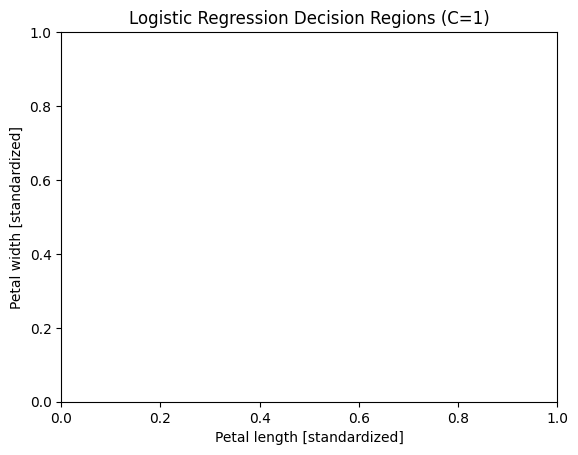

Model coefficients (C=1):
[[-2.31767322 -2.02652166]
 [ 1.15734013 -0.82005347]
 [ 2.31466167  2.46766408]]
Intercept: [-2.51865761 -0.72168583 -2.97816221]

Logistic Regression with C=100


c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.978
Probabilities for first 3 test samples:
[[6.63770505e-09 1.44747233e-01 8.55252760e-01]
 [8.34031210e-01 1.65968790e-01 3.20815954e-13]
 [8.48822884e-01 1.51177116e-01 2.57998350e-14]]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


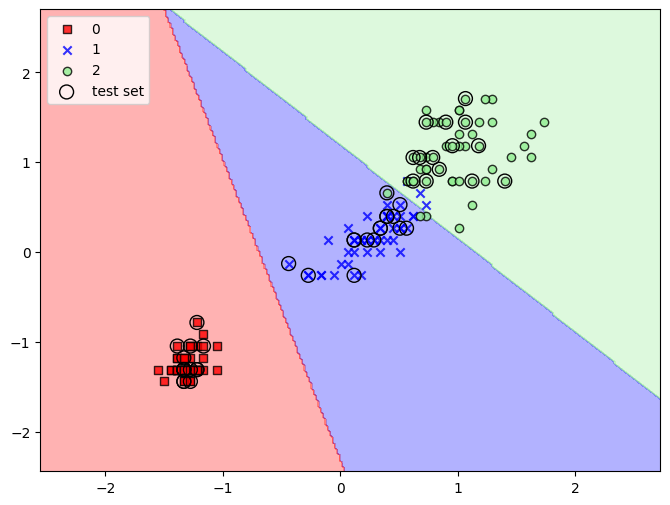

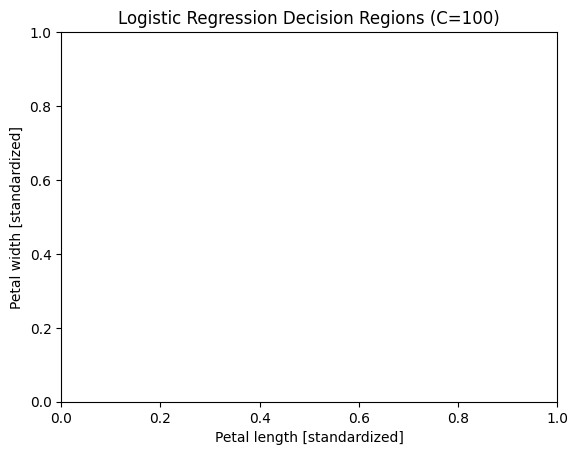

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:76: RuntimeWarning: divide by zero encountered in log
  cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) + (1/(2*self.C)) * np.sum(self.w_[1:]**2)
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:76: RuntimeWarning: invalid value encountered in dot
  cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) + (1/(2*self.C)) * np.sum(self.w_[1:]**2)
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:76: RuntimeWarning: overflow encountered in scalar multiply
  cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) + (1/(2*self.C)) * np.sum(self.w_[1:]**2)
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:76: RuntimeWarning: overflow encountered in square
  cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) + (1/(2*self.C)) * np.sum(self.w_[1:]**2)
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:72: RuntimeWarning: ov

Model coefficients (C=100):
[[-6.0342941  -4.6048211 ]
 [ 2.41082803 -2.07443668]
 [10.59380636  5.80728913]]
Intercept: [ -6.59654469  -0.75754247 -10.1767894 ]
LOGISTIC REGRESSION FROM SCRATCH (BINARY CLASSIFICATION)

Custom Logistic Regression with C=0.01
Accuracy: 0.667


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:125: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train_binary == 0, 0], X_train_std[y_train_binary == 0, 1],


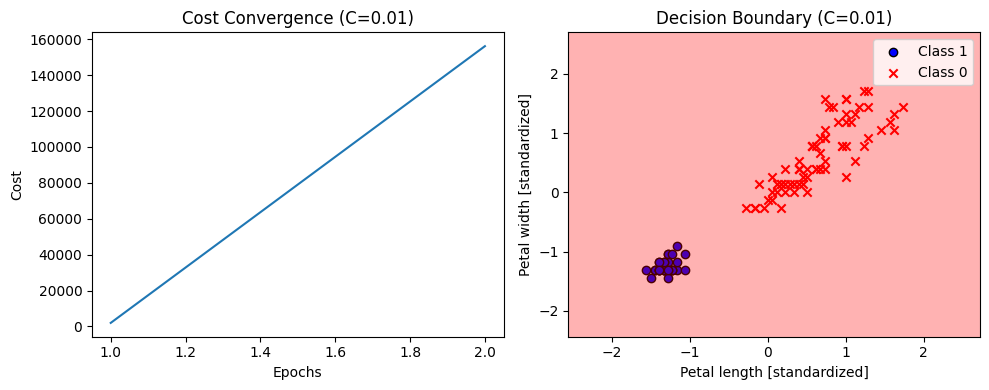


Custom Logistic Regression with C=1
Accuracy: 1.000


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:125: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train_binary == 0, 0], X_train_std[y_train_binary == 0, 1],


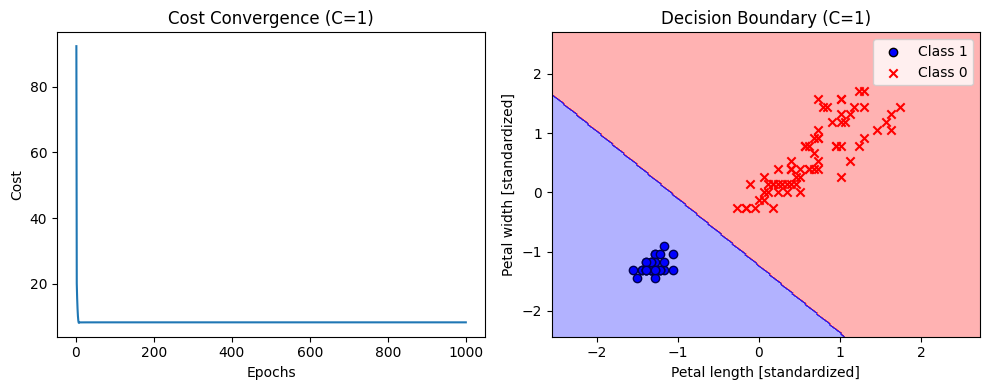


Custom Logistic Regression with C=100
Accuracy: 1.000


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1065107672.py:125: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train_binary == 0, 0], X_train_std[y_train_binary == 0, 1],


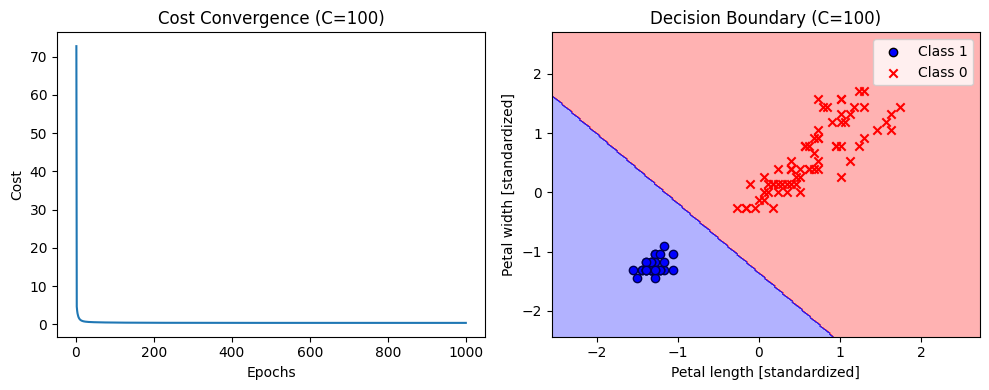


Comparison with sklearn implementation (binary classification):
Sklearn Accuracy: 1.000


In [100]:
#Exercise3
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Probabilities:', lr.predict_proba(X_test_std[:3]))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

#Tasks


# Test different C values
C_values = [0.01, 1, 100]

for C_val in C_values:
    print(f"\nLogistic Regression with C={C_val}")
    
    # Create and train logistic regression
    lr = LogisticRegression(C=C_val, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = lr.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.3f}')
    
    # Print probabilities for first 3 samples
    print('Probabilities for first 3 test samples:')
    print(lr.predict_proba(X_test_std[:3]))
    
    # Plot decision regions
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_combined_std, y_combined, classifier=lr, 
                         test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression Decision Regions (C={C_val})')
    plt.show()
    
    # Print model coefficients to understand regularization effect
    print(f"Model coefficients (C={C_val}):")
    print(lr.coef_)
    print(f"Intercept: {lr.intercept_}")

class LogisticRegressionGD:
    """Logistic Regression Classifier using gradient descent."""
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1, C=1.0):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.C = C  # Regularization parameter (inverse of lambda)
    
    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            
            # Gradient with L2 regularization
            self.w_[1:] += self.eta * (X.T.dot(errors) - (1/self.C) * self.w_[1:])
            self.w_[0] += self.eta * errors.sum()
            
            # Compute cost with regularization
            cost = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) + (1/(2*self.C)) * np.sum(self.w_[1:]**2)
            self.cost_.append(cost)
        
        return self
    
    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """Compute logistic sigmoid activation."""
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

# Test our implementation on binary classification (setosa vs. non-setosa)
# Convert to binary classification problem
y_train_binary = (y_train == 0).astype(int)
y_test_binary = (y_test == 0).astype(int)

# Test different C values with our implementation
print("LOGISTIC REGRESSION FROM SCRATCH (BINARY CLASSIFICATION)")


for C_val in [0.01, 1, 100]:
    print(f"\nCustom Logistic Regression with C={C_val}")
    
    lr_gd = LogisticRegressionGD(eta=0.1, n_iter=1000, C=C_val, random_state=1)
    lr_gd.fit(X_train_std, y_train_binary)
    
    y_pred_binary = lr_gd.predict(X_test_std)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    print(f'Accuracy: {accuracy:.3f}')
    
    # Plot cost convergence
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(lr_gd.cost_) + 1), lr_gd.cost_)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title(f'Cost Convergence (C={C_val})')
    
    # Plot decision boundary
    plt.subplot(1, 2, 2)
    # Create a simplified plot for binary classification
    plt.scatter(X_train_std[y_train_binary == 1, 0], X_train_std[y_train_binary == 1, 1], 
                c='blue', marker='o', label='Class 1', edgecolor='black')
    plt.scatter(X_train_std[y_train_binary == 0, 0], X_train_std[y_train_binary == 0, 1], 
                c='red', marker='x', label='Class 0', edgecolor='black')
    
    # Plot decision boundary
    x1_min, x1_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
    x2_min, x2_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = lr_gd.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue')))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Decision Boundary (C={C_val})')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Compare with sklearn's implementation for binary case
print("\nComparison with sklearn implementation (binary classification):")
lr_sklearn = LogisticRegression(C=1.0, random_state=1, solver='lbfgs')
lr_sklearn.fit(X_train_std, y_train_binary)
y_pred_sklearn = lr_sklearn.predict(X_test_std)
print(f'Sklearn Accuracy: {accuracy_score(y_test_binary, y_pred_sklearn):.3f}')


Accuracy: 0.9777777777777777


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


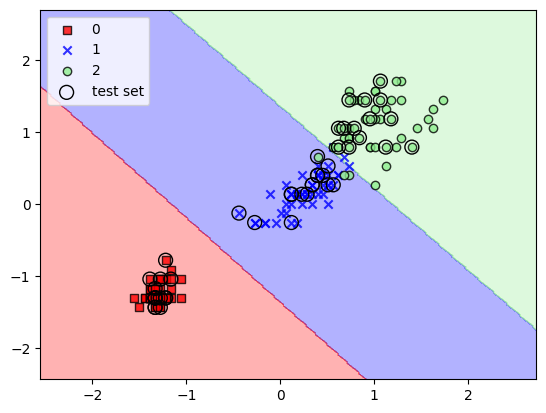


SVM with C=1.0
Accuracy: 0.978
Number of support vectors: 26
Support vector indices: [43 77 10 22 26 45 49 51 59 61 69 71 72 79 99  8 15 20 27 33 34 40 42 48
 66 81]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


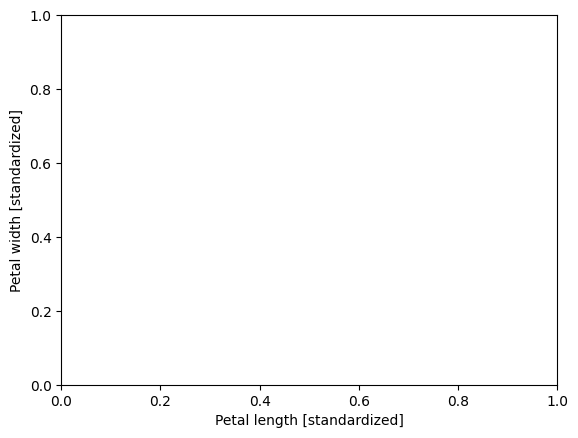

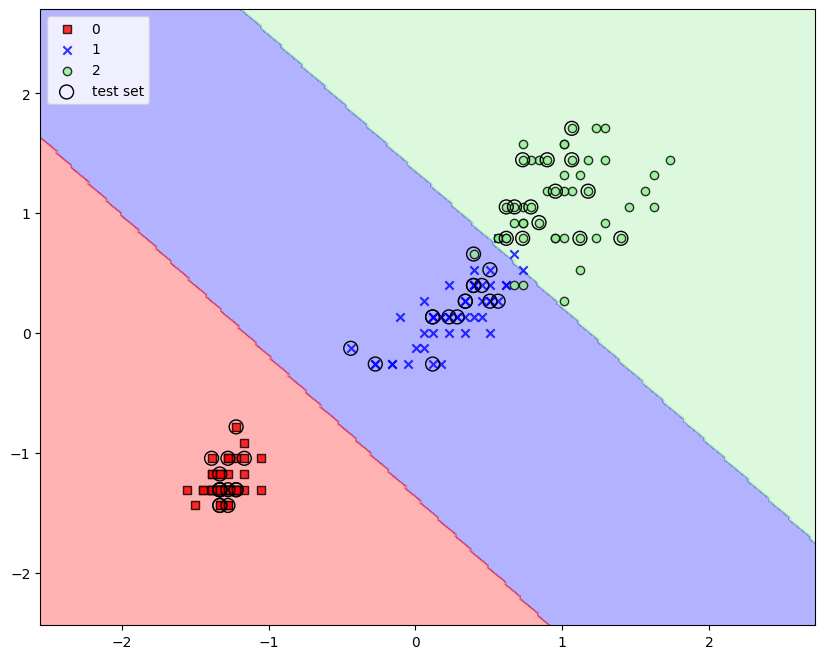

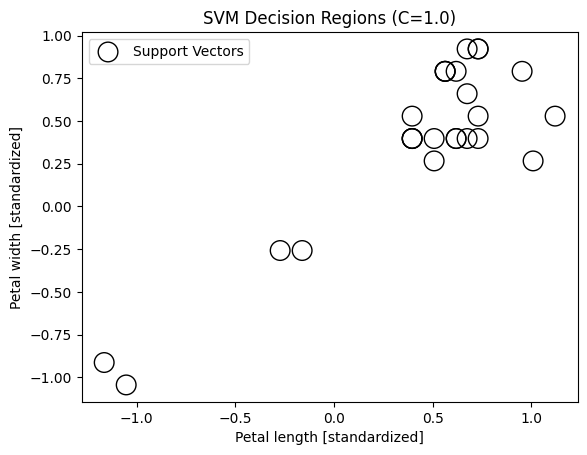


SVM with C=100.0
Accuracy: 0.978
Number of support vectors: 14
Support vector indices: [43 77 10 45 59 69 79 99 20 27 34 40 42 81]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


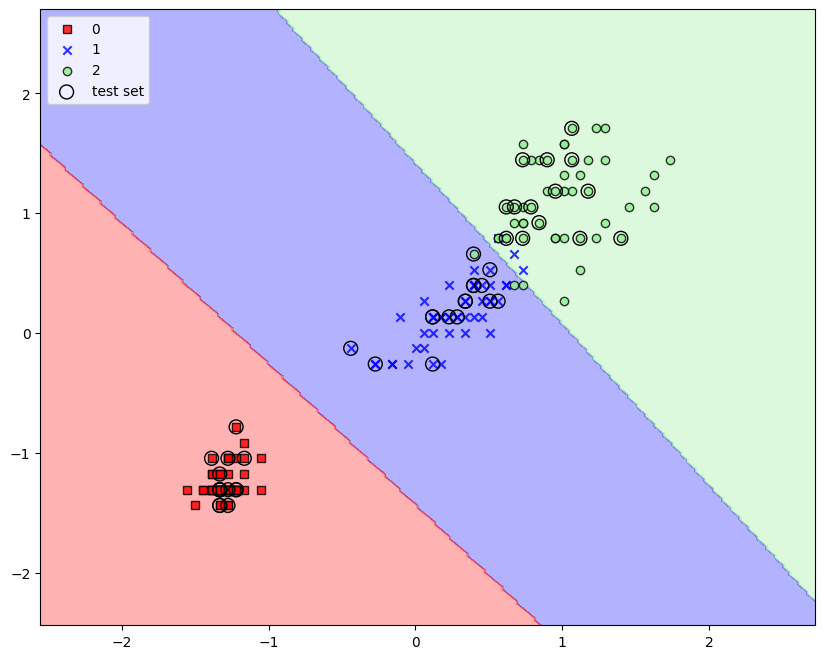

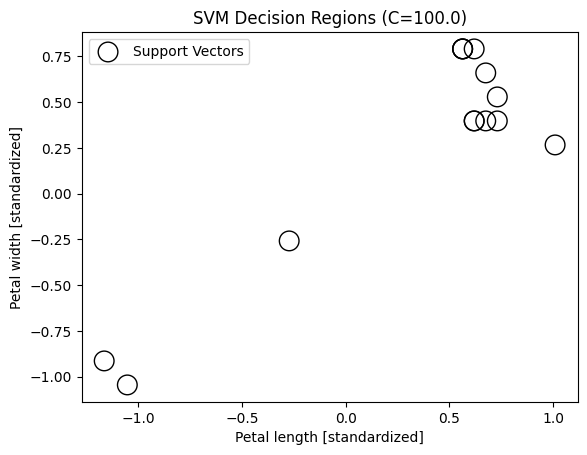

DETAILED SUPPORT VECTOR ANALYSIS
Total training samples: 105
Number of support vectors: 26
Support vector ratio: 24.76%

Support vectors by class:
Class 0: 2 support vectors
Class 1: 13 support vectors
Class 2: 11 support vectors


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


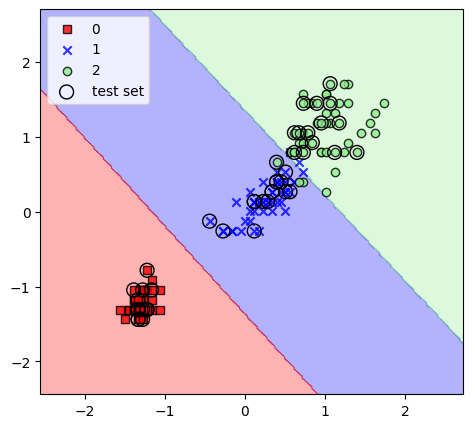

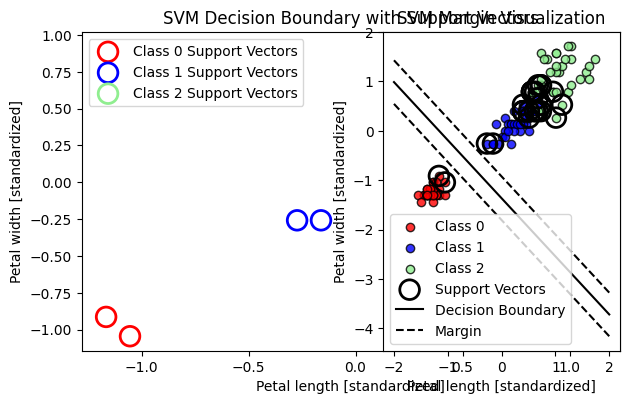


Comparing C=1.0 vs C=100.0:
C=1.0 - Number of support vectors: 26
C=100.0 - Number of support vectors: 14
C=1.0 - Margin: 0.5947
C=100.0 - Margin: 0.5524


In [101]:

#exercise 4

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

#Tasks


#  Compare different C values
C_values = [1.0, 100.0]

for C_val in C_values:
    print(f"\nSVM with C={C_val}")
    
    # Create and train SVM
    svm = SVC(kernel='linear', C=C_val, random_state=1)
    svm.fit(X_train_std, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.3f}')
    
    # Print number of support vectors
    print(f'Number of support vectors: {len(svm.support_vectors_)}')
    print(f'Support vector indices: {svm.support_}')
    
    # Plot decision regions
    plt.figure(figsize=(10, 8))
    plot_decision_regions(X_combined_std, y_combined, classifier=svm, 
                         test_idx=range(len(X_train), len(X_combined_std)))
    
    # Highlight support vectors
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
                s=200, linewidth=1, facecolors='none', edgecolors='black', 
                label='Support Vectors')
    
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'SVM Decision Regions (C={C_val})')
    plt.legend()
    plt.show()

# Detailed analysis of support vectors
print("DETAILED SUPPORT VECTOR ANALYSIS")


# Train SVM with C=1.0 for detailed analysis
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

print(f"Total training samples: {len(X_train_std)}")
print(f"Number of support vectors: {len(svm.support_vectors_)}")
print(f"Support vector ratio: {len(svm.support_vectors_)/len(X_train_std):.2%}")

# Analyze support vectors by class
support_vector_indices = svm.support_
support_vector_labels = y_train[support_vector_indices]

print("\nSupport vectors by class:")
for class_label in np.unique(y_train):
    count = np.sum(support_vector_labels == class_label)
    print(f"Class {class_label}: {count} support vectors")

# Plot support vectors with more detail
plt.figure(figsize=(12, 5))

# Plot 1: Decision boundary with support vectors
plt.subplot(1, 2, 1)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, 
                     test_idx=range(len(X_train), len(X_combined_std)))

# Color support vectors by class
colors = ['red', 'blue', 'lightgreen']
for idx, cl in enumerate(np.unique(y_train)):
    class_sv_indices = support_vector_indices[support_vector_labels == cl]
    class_sv = svm.support_vectors_[support_vector_labels == cl]
    plt.scatter(class_sv[:, 0], class_sv[:, 1], 
                s=200, linewidth=2, facecolors='none', 
                edgecolors=colors[idx], label=f'Class {cl} Support Vectors')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()

# Plot 2: Margin visualization
plt.subplot(1, 2, 2)
# Plot training data
for idx, cl in enumerate(np.unique(y_train)):
    plt.scatter(X_train_std[y_train == cl, 0], X_train_std[y_train == cl, 1],
                alpha=0.8, c=colors[idx], marker='o', label=f'Class {cl}', edgecolor='black')

# Plot support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=200, linewidth=2, facecolors='none', edgecolors='black', 
            label='Support Vectors')

# Get the separating hyperplane
w = svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - (svm.intercept_[0]) / w[1]

# Plot the margin
margin = 1 / np.sqrt(np.sum(svm.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('SVM Margin Visualization')
plt.legend()
plt.tight_layout()
plt.show()

# Compare with high C value
print("\nComparing C=1.0 vs C=100.0:")
svm_highC = SVC(kernel='linear', C=100.0, random_state=1)
svm_highC.fit(X_train_std, y_train)

print(f"C=1.0 - Number of support vectors: {len(svm.support_vectors_)}")
print(f"C=100.0 - Number of support vectors: {len(svm_highC.support_vectors_)}")
print(f"C=1.0 - Margin: {1/np.sqrt(np.sum(svm.coef_[0]**2)):.4f}")
print(f"C=100.0 - Margin: {1/np.sqrt(np.sum(svm_highC.coef_[0]**2)):.4f}")

Accuracy: 0.8333333333333334


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


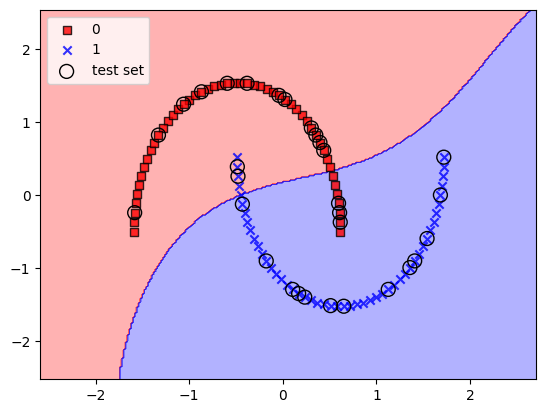

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


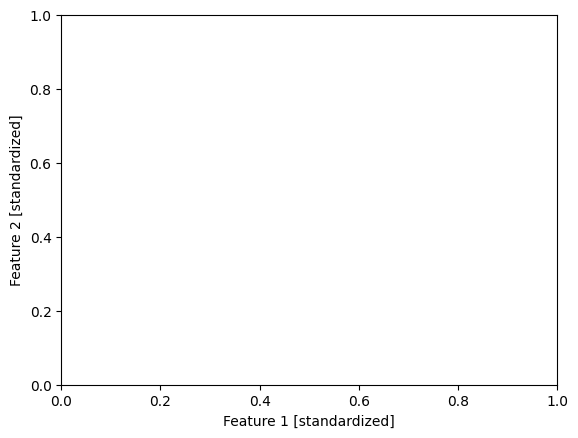

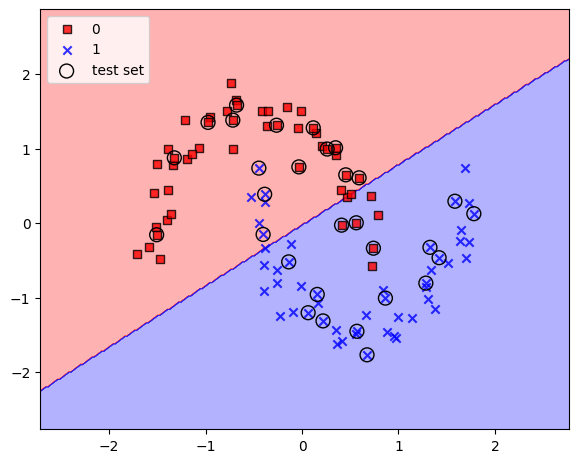

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


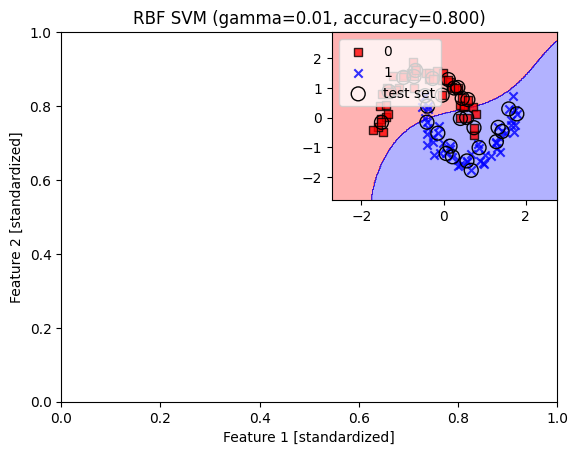

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


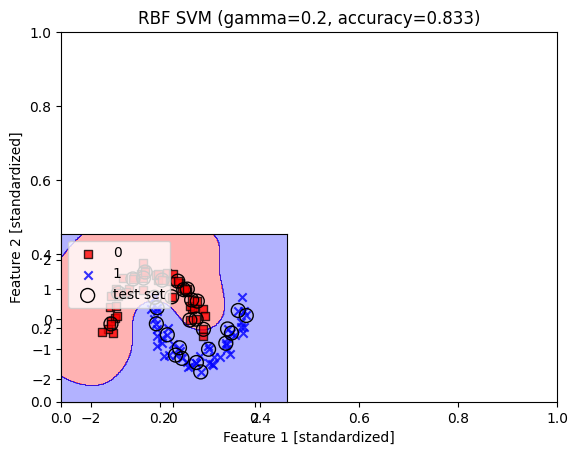

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


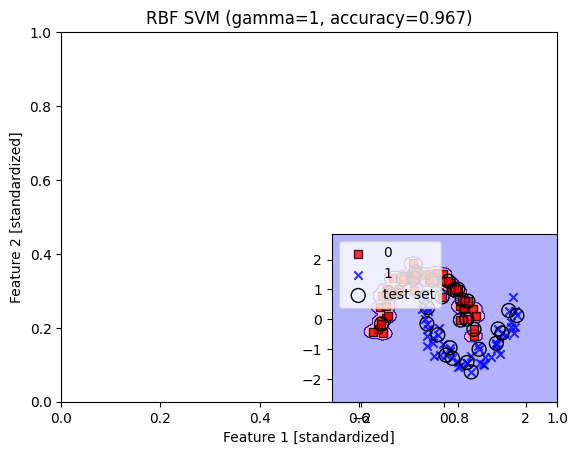

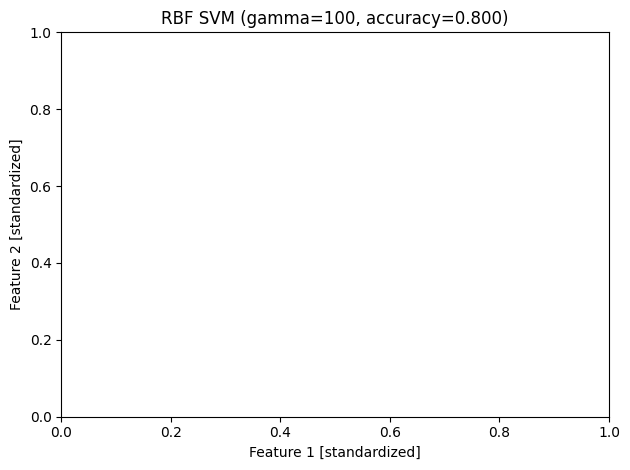

COMPARING LINEAR AND RBF SVM ON IRIS DATASET
Linear SVM Accuracy: 0.978

RBF SVM Performance on Iris Dataset:
Gamma=0.01: Accuracy=0.978
Gamma=0.1: Accuracy=0.978
Gamma=1: Accuracy=0.978
Gamma=10: Accuracy=0.978
Gamma=100: Accuracy=0.933


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


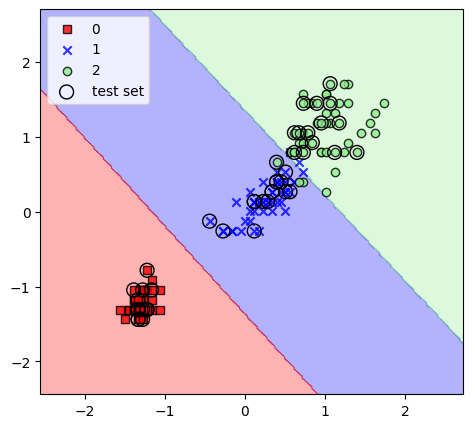

C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


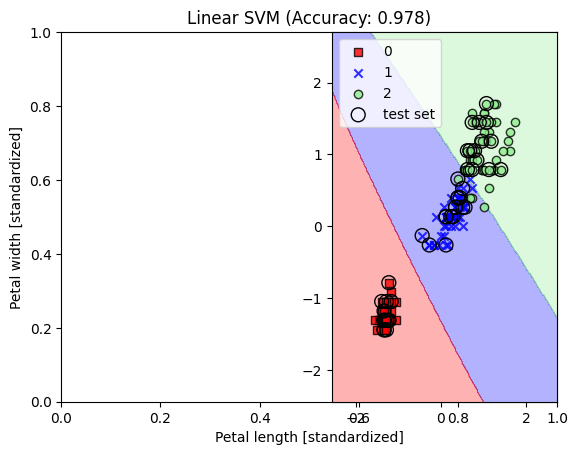

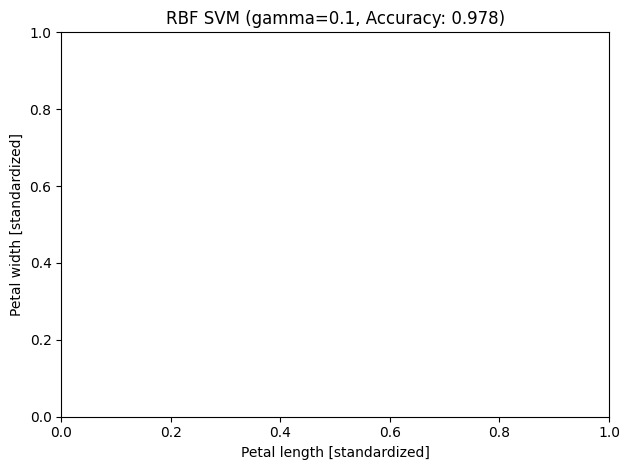


Support Vectors Comparison:
Linear SVM number of support vectors: 26
RBF SVM number of support vectors: 46


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1702523952.py:140: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train == cl, 0], X_train_std[y_train == cl, 1],
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1702523952.py:140: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train == cl, 0], X_train_std[y_train == cl, 1],
C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\1702523952.py:140: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_train_std[y_train == cl, 0], X_train_std[y_tra

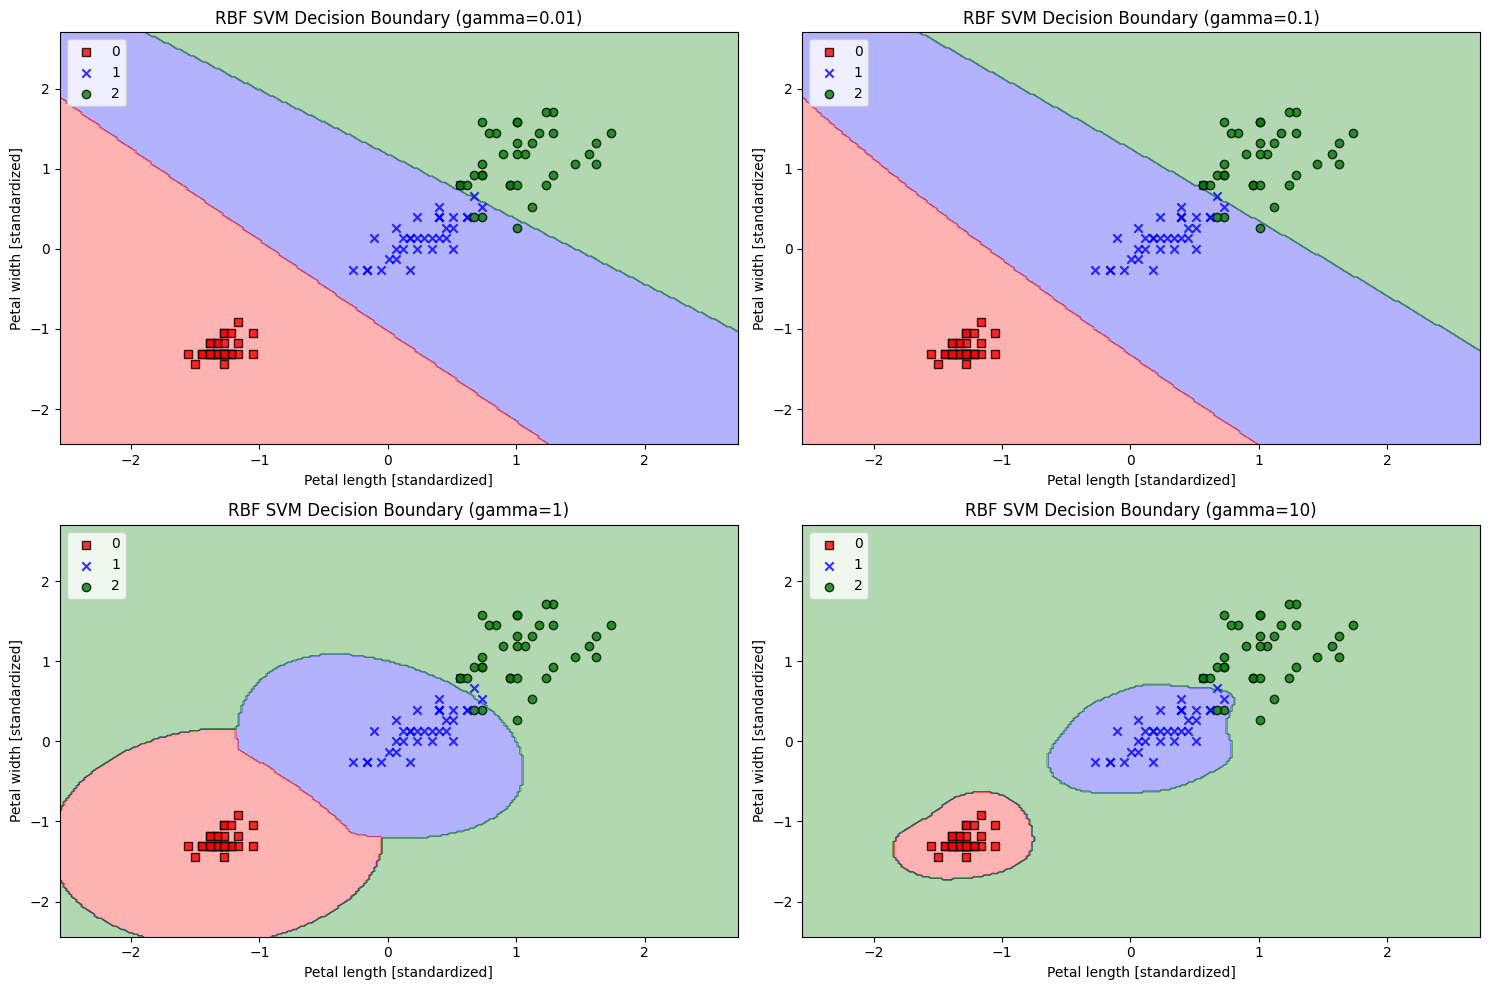

In [102]:
#Exercise 5

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm_rbf.fit(X_train_m_std, y_train_m)

y_pred_m = svm_rbf.predict(X_test_m_std)
print('Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf, test_idx=range(len(X_train_m), len(X_combined_m_std)))
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')

#Tasks


# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=100, random_state=123, noise=0.1)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

# Standardize the features
sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

#Tune gamma parameter on moons dataset
gamma_values = [0.01, 0.2, 1, 100]

plt.figure(figsize=(15, 12))

for i, gamma_val in enumerate(gamma_values, 1):
    # Create and train RBF SVM
    svm_rbf = SVC(kernel='rbf', random_state=1, gamma=gamma_val, C=1.0)
    svm_rbf.fit(X_train_m_std, y_train_m)
    
    # Make predictions and calculate accuracy
    y_pred_m = svm_rbf.predict(X_test_m_std)
    accuracy = accuracy_score(y_test_m, y_pred_m)
    
    # Plot decision regions
    plt.subplot(2, 2, i)
    plot_decision_regions(X_combined_m_std, y_combined_m, classifier=svm_rbf, 
                         test_idx=range(len(X_train_m), len(X_combined_m_std)))
    plt.xlabel('Feature 1 [standardized]')
    plt.ylabel('Feature 2 [standardized]')
    plt.title(f'RBF SVM (gamma={gamma_val}, accuracy={accuracy:.3f})')

plt.tight_layout()
plt.show()

#Apply RBF SVM to Iris dataset and compare with linear SVM
print("COMPARING LINEAR AND RBF SVM ON IRIS DATASET")

# Linear SVM on Iris
svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)
y_pred_linear = svm_linear.predict(X_test_std)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {accuracy_linear:.3f}")

# RBF SVM on Iris with different gamma values
gamma_values_iris = [0.01, 0.1, 1, 10, 100]

print("\nRBF SVM Performance on Iris Dataset:")
for gamma_val in gamma_values_iris:
    svm_rbf_iris = SVC(kernel='rbf', random_state=1, gamma=gamma_val, C=1.0)
    svm_rbf_iris.fit(X_train_std, y_train)
    y_pred_rbf = svm_rbf_iris.predict(X_test_std)
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
    print(f"Gamma={gamma_val}: Accuracy={accuracy_rbf:.3f}")

# Visualize best RBF SVM on Iris dataset
best_gamma = 0.1  # Based on the results above
svm_rbf_best = SVC(kernel='rbf', random_state=1, gamma=best_gamma, C=1.0)
svm_rbf_best.fit(X_train_std, y_train)

plt.figure(figsize=(12, 5))

# Plot linear SVM
plt.subplot(1, 2, 1)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_linear,
                     test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title(f'Linear SVM (Accuracy: {accuracy_linear:.3f})')

# Plot RBF SVM
plt.subplot(1, 2, 2)
plot_decision_regions(X_combined_std, y_combined, classifier=svm_rbf_best,
                     test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title(f'RBF SVM (gamma={best_gamma}, Accuracy: {accuracy_score(y_test, svm_rbf_best.predict(X_test_std)):.3f})')

plt.tight_layout()
plt.show()

# Additional analysis: Support vectors comparison
print("\nSupport Vectors Comparison:")
print(f"Linear SVM number of support vectors: {len(svm_linear.support_vectors_)}")
print(f"RBF SVM number of support vectors: {len(svm_rbf_best.support_vectors_)}")

# Decision boundary complexity analysis
def plot_decision_boundary_complexity():
    """Visualize how gamma affects decision boundary complexity"""
    plt.figure(figsize=(15, 10))
    
    # Create a mesh grid
    x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
    y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Plot for different gamma values
    for i, gamma_val in enumerate([0.01, 0.1, 1, 10], 1):
        svm = SVC(kernel='rbf', gamma=gamma_val, C=1.0, random_state=1)
        svm.fit(X_train_std, y_train)
        
        # Plot decision boundary
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.subplot(2, 2, i)
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'blue', 'green')))
        
        # Plot training data
        for idx, cl in enumerate(np.unique(y_train)):
            plt.scatter(X_train_std[y_train == cl, 0], X_train_std[y_train == cl, 1],
                        alpha=0.8, c=['red', 'blue', 'green'][idx], 
                        marker=['s', 'x', 'o'][idx], label=cl, edgecolor='black')
        
        plt.xlabel('Petal length [standardized]')
        plt.ylabel('Petal width [standardized]')
        plt.title(f'RBF SVM Decision Boundary (gamma={gamma_val})')
        plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary_complexity()

Accuracy: 0.9777777777777777


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


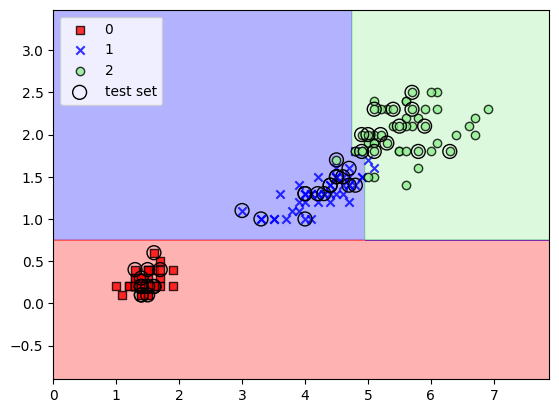

Accuracy with max_depth=4: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


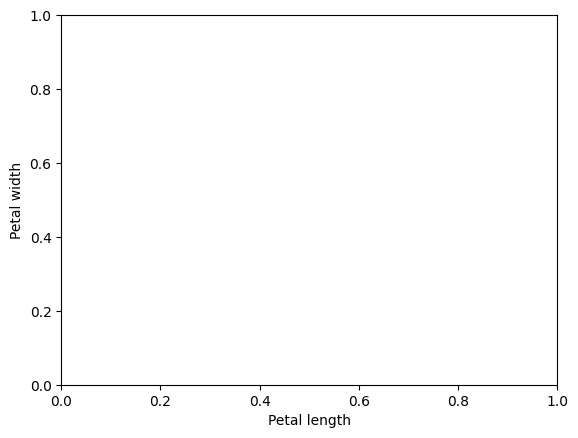

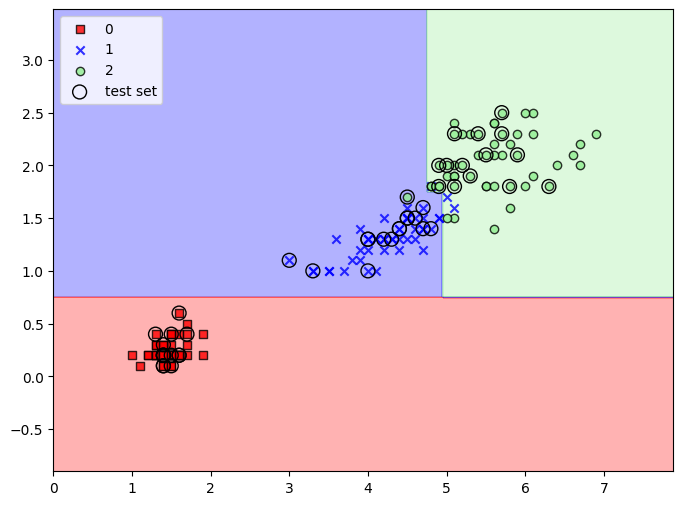

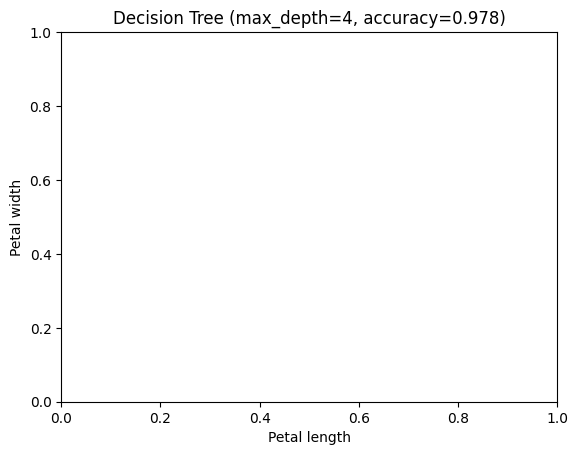

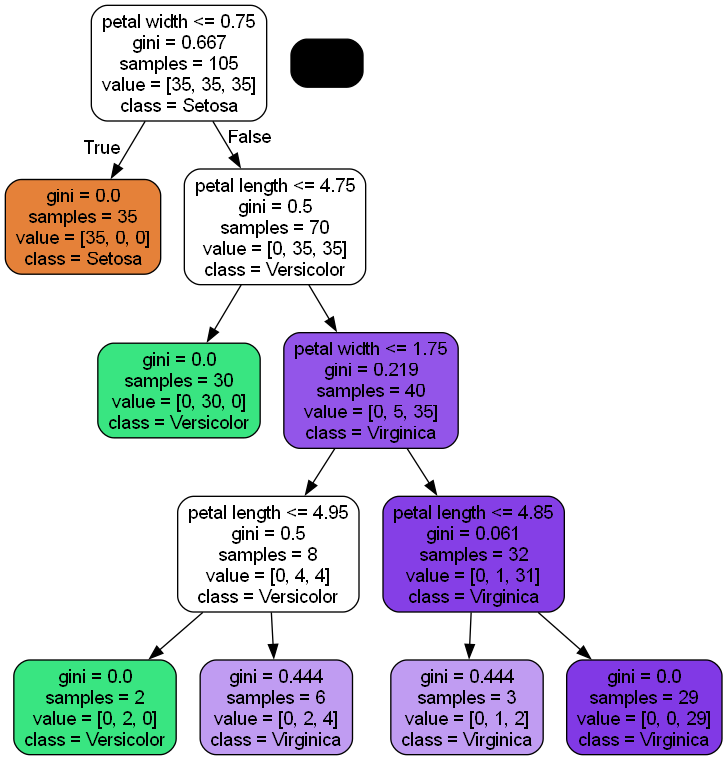

Feature importances: [0.42708333 0.57291667]


In [103]:
# Exercise 6 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # No scaling needed

y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')

dot_data = export_graphviz(tree, filled=True, rounded=True, class_names=['Setosa', 'Versicolor', 'Virginica'],
                          feature_names=['petal length', 'petal width'], out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

#Tasks

# Create and train decision tree with max_depth=4
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with max_depth=4: {accuracy:.3f}')

# Combine training and test sets for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined, y_combined, classifier=tree, 
                     test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title(f'Decision Tree (max_depth=4, accuracy={accuracy:.3f})')
plt.show()

# Export and display the tree visualization
dot_data = export_graphviz(
    tree,
    filled=True,
    rounded=True,
    class_names=['Setosa', 'Versicolor', 'Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
)

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Save and display the tree
tree_filename = 'decision_tree_depth_4.png'
graph.write_png(tree_filename)

# Display the image (if in Jupyter notebook)
try:
    display(Image(filename=tree_filename))
except:
    print(f"Tree visualization saved as {tree_filename}")

# Print feature importances
print("Feature importances:", tree.feature_importances_)



Accuracy: 0.9777777777777777
Feature Importances: [0.52140135 0.47859865]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


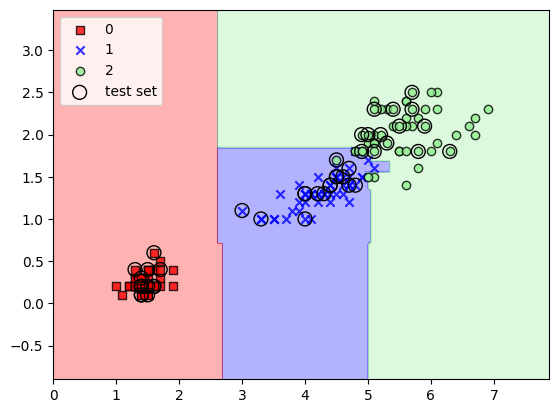

Accuracy with 100 estimators: 0.978
Feature Importances: [0.48273366 0.51726634]


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


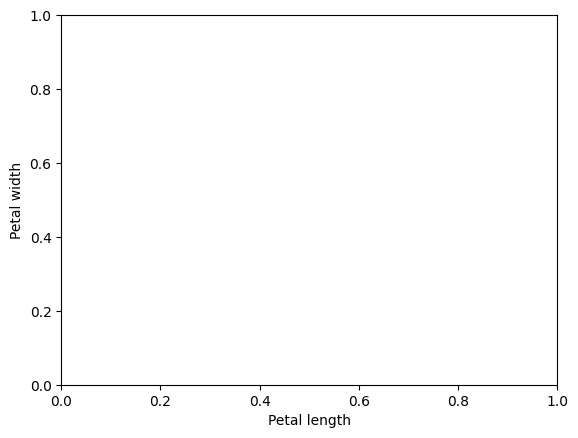

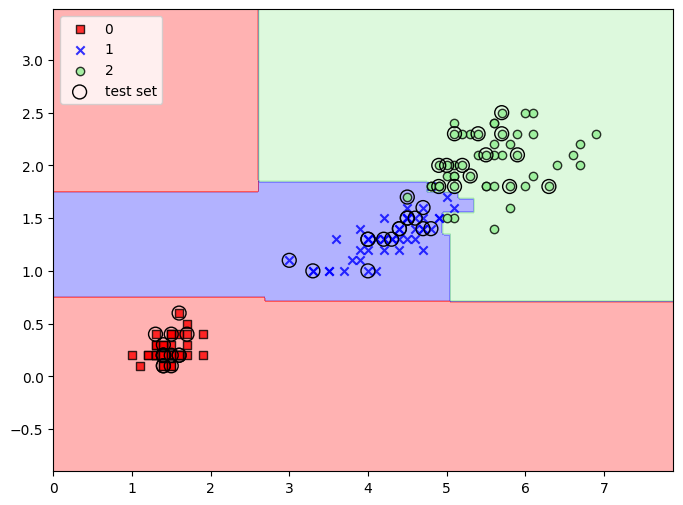

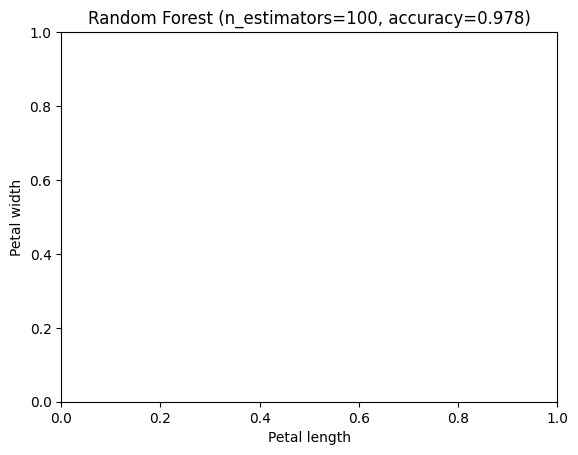

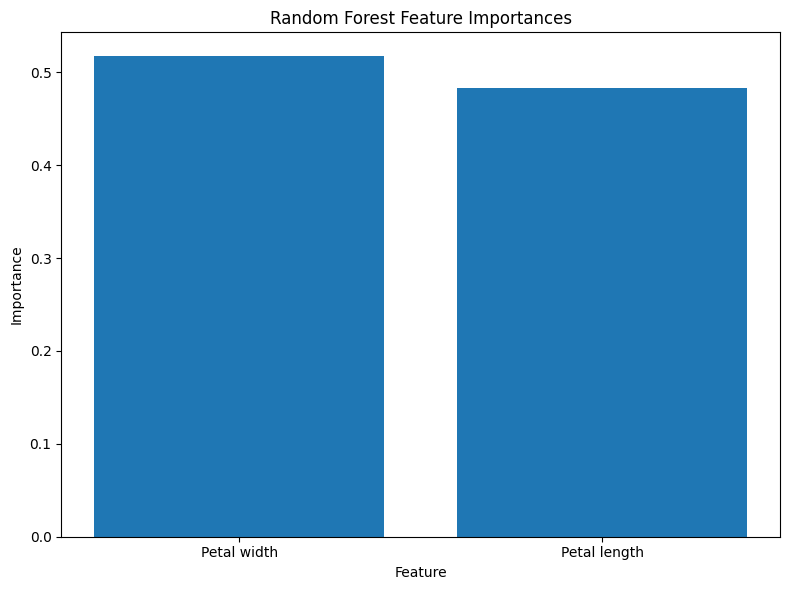

Accuracy with OOB: 0.978
OOB Score: 0.943
Feature Importances with OOB: [0.48273366 0.51726634]
n_estimators=10: Accuracy=0.978, OOB Score=0.924


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


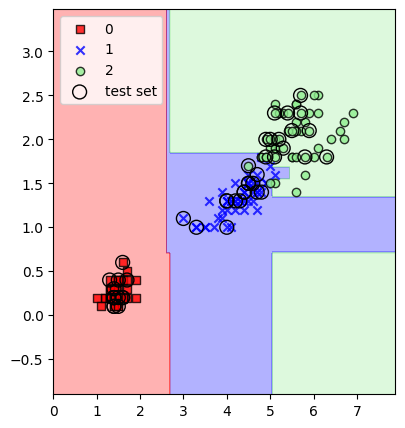

n_estimators=25: Accuracy=0.978, OOB Score=0.952
n_estimators=50: Accuracy=0.978, OOB Score=0.962


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


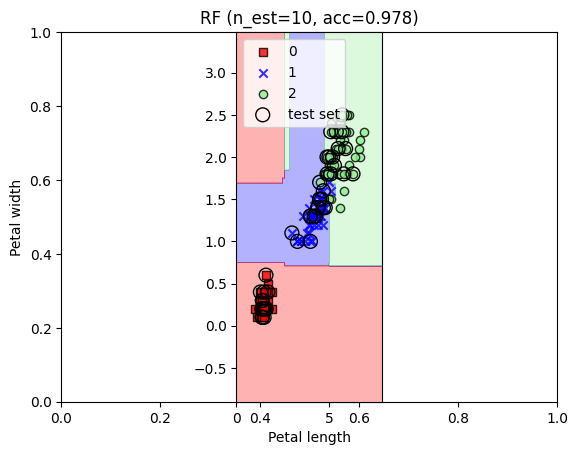

n_estimators=100: Accuracy=0.978, OOB Score=0.943
n_estimators=200: Accuracy=0.978, OOB Score=0.952


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


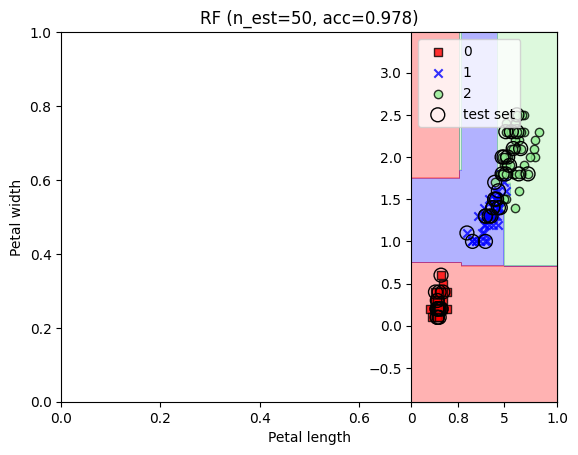

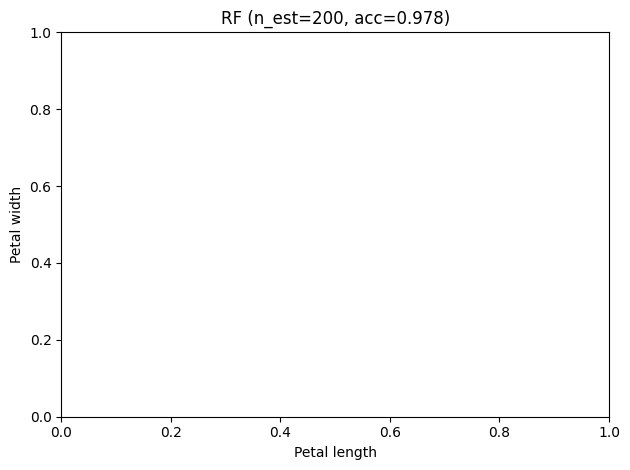

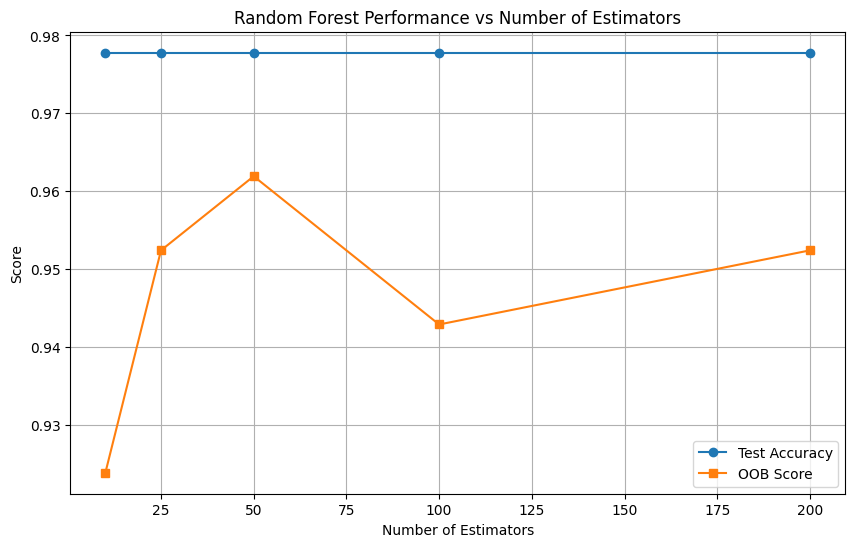

In [104]:
#Exercise 7

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')



#Tasks


# Create combined dataset for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Task 1: Increase n_estimators to 100 and plot feature importances
forest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with 100 estimators: {accuracy:.3f}')
print('Feature Importances:', forest.feature_importances_)

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined, y_combined, classifier=forest, 
                     test_idx=range(len(X_train), len(X_combined)))
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title(f'Random Forest (n_estimators=100, accuracy={accuracy:.3f})')
plt.show()

# Plot feature importances
plt.figure(figsize=(8, 6))
features = ['Petal length', 'Petal width']  # Update if you have more features
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()

# Task 2: Use OOB score
forest_oob = RandomForestClassifier(criterion='gini', n_estimators=100, 
                                   random_state=1, n_jobs=2, oob_score=True)
forest_oob.fit(X_train, y_train)

y_pred_oob = forest_oob.predict(X_test)
accuracy_oob = accuracy_score(y_test, y_pred_oob)
print(f'Accuracy with OOB: {accuracy_oob:.3f}')
print(f'OOB Score: {forest_oob.oob_score_:.3f}')
print('Feature Importances with OOB:', forest_oob.feature_importances_)

# Additional analysis: Compare different numbers of estimators
n_estimators_list = [10, 25, 50, 100, 200]
accuracies = []
oob_scores = []

plt.figure(figsize=(15, 5))

for i, n_est in enumerate(n_estimators_list, 1):
    # Create and train Random Forest
    forest_var = RandomForestClassifier(criterion='gini', n_estimators=n_est, 
                                      random_state=1, n_jobs=2, oob_score=True)
    forest_var.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred_var = forest_var.predict(X_test)
    accuracy_var = accuracy_score(y_test, y_pred_var)
    accuracies.append(accuracy_var)
    oob_scores.append(forest_var.oob_score_)
    
    print(f'n_estimators={n_est}: Accuracy={accuracy_var:.3f}, OOB Score={forest_var.oob_score_:.3f}')
    
    # Plot decision regions for selected n_estimators
    if n_est in [10, 50, 200]:
        plt.subplot(1, 3, (i+1)//2)  # Arrange in 1x3 grid
        plot_decision_regions(X_combined, y_combined, classifier=forest_var,
                             test_idx=range(len(X_train), len(X_combined)))
        plt.xlabel('Petal length')
        plt.ylabel('Petal width')
        plt.title(f'RF (n_est={n_est}, acc={accuracy_var:.3f})')

plt.tight_layout()
plt.show()

# Plot accuracy and OOB score vs n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, 'o-', label='Test Accuracy')
plt.plot(n_estimators_list, oob_scores, 's-', label='OOB Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Random Forest Performance vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()



Accuracy: 1.0


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


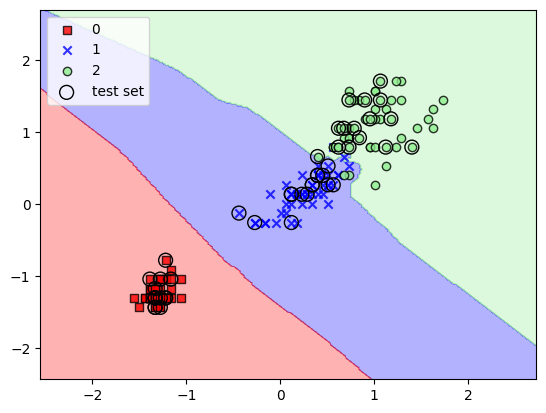

KNN with 1 neighbors (Euclidean distance) - Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


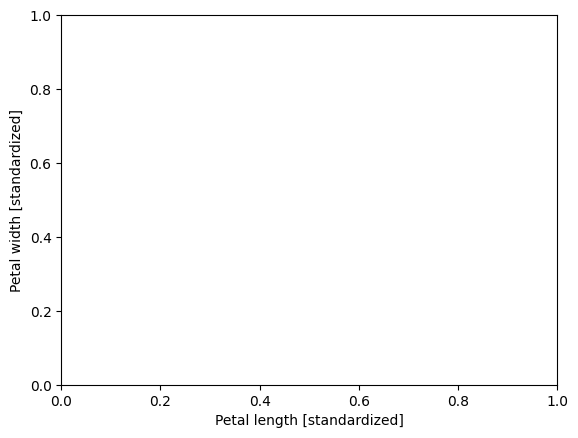

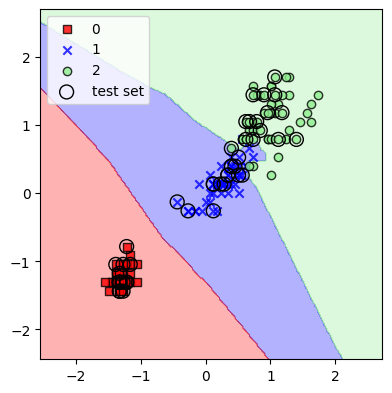

KNN with 5 neighbors (Euclidean distance) - Accuracy: 1.000


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


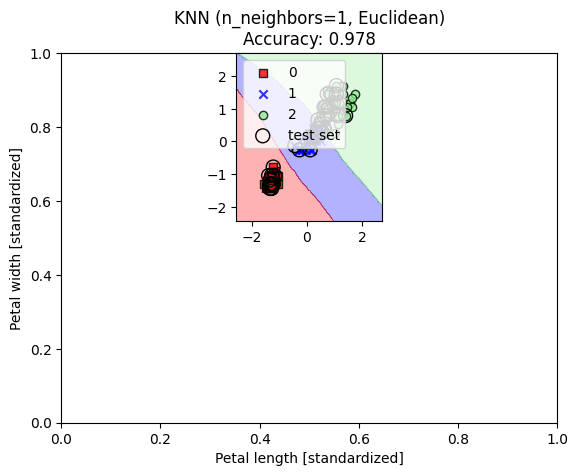

KNN with 10 neighbors (Euclidean distance) - Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


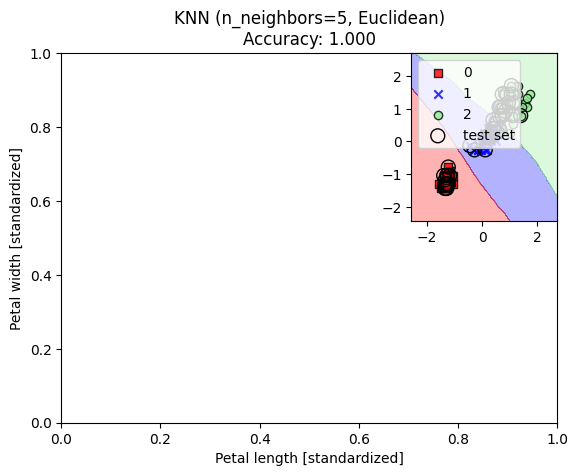

KNN with 1 neighbors (Manhattan distance) - Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


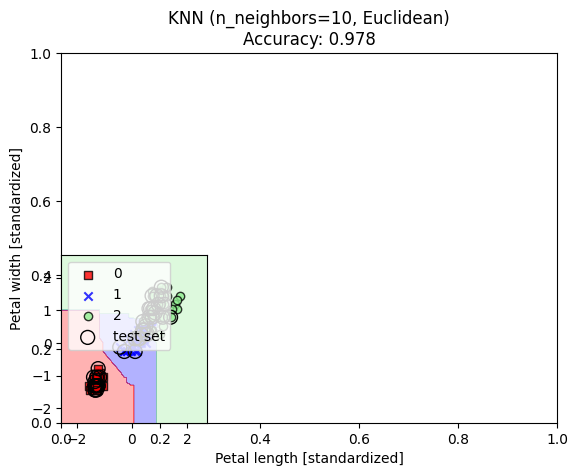

KNN with 5 neighbors (Manhattan distance) - Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


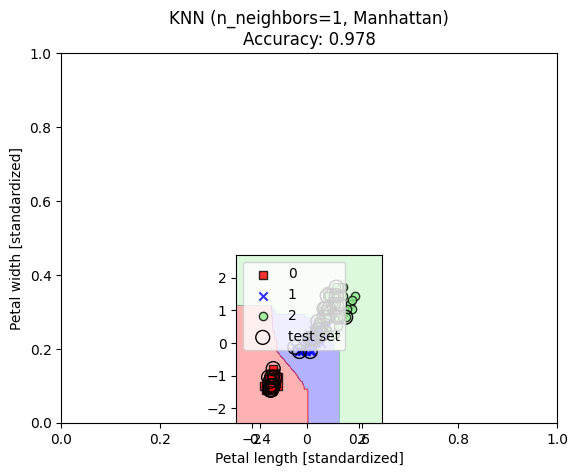

KNN with 10 neighbors (Manhattan distance) - Accuracy: 0.978


C:\Users\comfo\AppData\Local\Temp\ipykernel_20244\3213227116.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


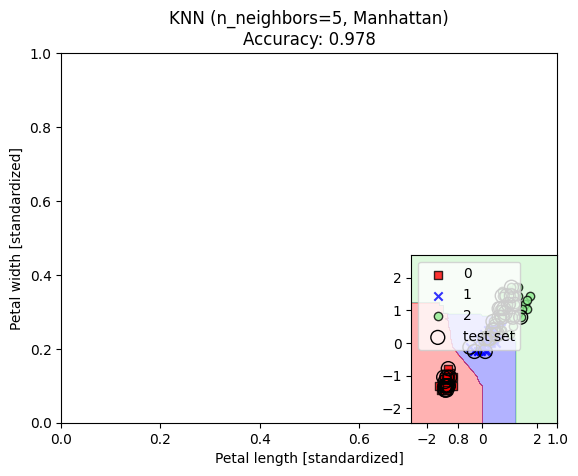

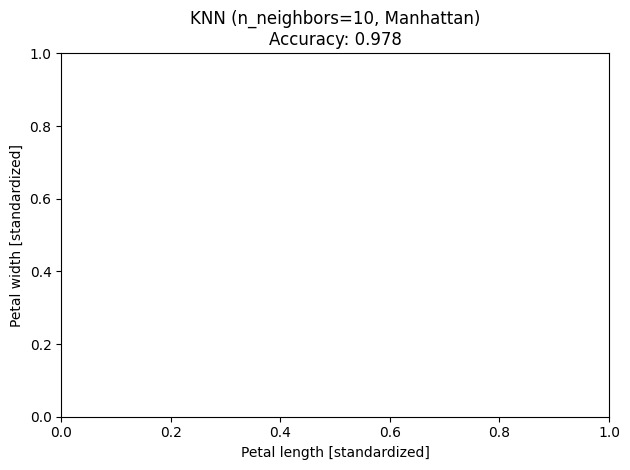

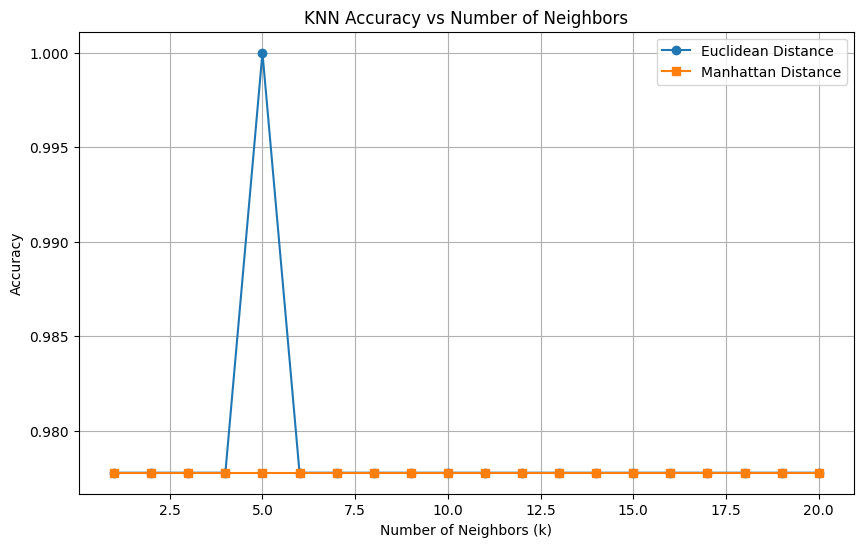

Optimal k for Euclidean distance: 5 (Accuracy: 1.000)
Optimal k for Manhattan distance: 1 (Accuracy: 0.978)


In [105]:
#Exercise 8

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score



knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(len(X_train), len(X_combined_std)))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')


#Tasks

# Initialize lists to store results
neighbors = [1, 5, 10]
accuracies_euclidean = []
accuracies_manhattan = []

# Create a combined dataset for plotting
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Create a figure for decision boundaries
plt.figure(figsize=(15, 10))

#Vary n_neighbors with Euclidean distance (p=2)
for i, n in enumerate(neighbors, 1):
    # Create and train KNN classifier with Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=n, p=2, metric='minkowski')
    knn.fit(X_train_std, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_euclidean.append(accuracy)
    
    print(f'KNN with {n} neighbors (Euclidean distance) - Accuracy: {accuracy:.3f}')
    
    # Plot decision regions
    plt.subplot(2, 3, i)
    plot_decision_regions(X_combined_std, y_combined, classifier=knn, 
                         test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (n_neighbors={n}, Euclidean)\nAccuracy: {accuracy:.3f}')

#Use Manhattan distance (p=1)
for i, n in enumerate(neighbors, 4):
    # Create and train KNN classifier with Manhattan distance
    knn = KNeighborsClassifier(n_neighbors=n, p=1, metric='minkowski')
    knn.fit(X_train_std, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = knn.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_manhattan.append(accuracy)
    
    print(f'KNN with {n} neighbors (Manhattan distance) - Accuracy: {accuracy:.3f}')
    
    # Plot decision regions
    plt.subplot(2, 3, i)
    plot_decision_regions(X_combined_std, y_combined, classifier=knn, 
                         test_idx=range(len(X_train), len(X_combined_std)))
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (n_neighbors={n}, Manhattan)\nAccuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()

# Additional analysis: Compare accuracy for different k values
k_values = range(1, 21)
euclidean_accuracies = []
manhattan_accuracies = []

for k in k_values:
    # Euclidean distance
    knn_euc = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn_euc.fit(X_train_std, y_train)
    y_pred_euc = knn_euc.predict(X_test_std)
    euclidean_accuracies.append(accuracy_score(y_test, y_pred_euc))
    
    # Manhattan distance
    knn_man = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn_man.fit(X_train_std, y_train)
    y_pred_man = knn_man.predict(X_test_std)
    manhattan_accuracies.append(accuracy_score(y_test, y_pred_man))

# Plot accuracy vs k for both distance metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, euclidean_accuracies, 'o-', label='Euclidean Distance')
plt.plot(k_values, manhattan_accuracies, 's-', label='Manhattan Distance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Find optimal k for each distance metric
optimal_k_euc = k_values[np.argmax(euclidean_accuracies)]
optimal_k_man = k_values[np.argmax(manhattan_accuracies)]

print(f"Optimal k for Euclidean distance: {optimal_k_euc} (Accuracy: {max(euclidean_accuracies):.3f})")
print(f"Optimal k for Manhattan distance: {optimal_k_man} (Accuracy: {max(manhattan_accuracies):.3f})")



In [106]:
#Exercise 9
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np



param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_std, y_train)
print('Best params:', grid.best_params_)
print('Best score:', grid.best_score_)

models = {'Perceptron': ppn, 'LogReg': lr, 'SVM': svm, 'Tree': tree, 'Forest': forest, 'KNN': knn}
for name, model in models.items():
    y_pred = model.predict(X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')

#Apply GridSearchCV to Logistic Regression
print("Tuning Logistic Regression...")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}

grid_lr = GridSearchCV(LogisticRegression(random_state=1), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(X_train_std, y_train)

print('Best params for Logistic Regression:', grid_lr.best_params_)
print('Best score for Logistic Regression:', grid_lr.best_score_)


#Tasks

# Use the best estimator
best_lr = grid_lr.best_estimator_

# 2. Apply GridSearchCV to KNN
print("\nTuning KNN...")
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train_std, y_train)

print('Best params for KNN:', grid_knn.best_params_)
print('Best score for KNN:', grid_knn.best_score_)

# Use the best estimator
best_knn = grid_knn.best_estimator_

#Create a table comparing accuracies across classifiers on Iris and moons datasets


models = {
    'Perceptron': ppn,
    'Logistic Regression': best_lr,
    'SVM': svm, 
    'Decision Tree': tree, 
    'Random Forest': forest,  
    'KNN': best_knn
}

# Evaluate on Iris dataset
iris_results = {}
for name, model in models.items():
    # Standardized features for models that need them
    if name in ['Perceptron', 'Logistic Regression', 'SVM', 'KNN']:
        y_pred = model.predict(X_test_std)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    iris_results[name] = accuracy

# Evaluate on Moons dataset
moons_results = {}
for name, model in models.items():
    # Standardized features for models that need them
    if name in ['Perceptron', 'Logistic Regression', 'SVM', 'KNN']:
        y_pred = model.predict(X_test_moons_std)
    else:
        y_pred = model.predict(X_test_moons)
    accuracy = accuracy_score(y_test_moons, y_pred)
    moons_results[name] = accuracy

# Create comparison table
comparison_df = pd.DataFrame({
    'Iris Dataset': iris_results,
    'Moons Dataset': moons_results
})


print("MODEL COMPARISON ACROSS DATASETS")
print(comparison_df)

#Discussion
'''
1. Linear Models (Perceptron, Logistic Regression):
- Work well on linearly separable data like Iris
- Struggle with nonlinear data like Moons
- Logistic Regression often outperforms Perceptron due to probabilistic approach

2. Nonlinear Models (SVM with RBF kernel, Decision Trees, Random Forests, KNN):
- Can handle complex, nonlinear decision boundaries
- Generally perform better on nonlinear datasets like Moons
- May overfit on simpler datasets if not properly regularized

3. Dataset Characteristics:
- Iris: Mostly linearly separable, especially between Setosa and others
- Moons: Highly nonlinear, requires complex decision boundaries

4. Model Selection Guidelines:
- For linear data: Logistic Regression, Linear SVM
- For nonlinear data: Kernel SVM, Random Forest, KNN
- For interpretability: Decision Trees, Logistic Regression
- For high accuracy: Random Forest, Gradient Boosting, Kernel SVM

'''




Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score: 0.9619047619047618
Perceptron Accuracy: 0.8888888888888888
LogReg Accuracy: 0.9777777777777777
SVM Accuracy: 0.9777777777777777
Tree Accuracy: 0.9777777777777777
Forest Accuracy: 0.9777777777777777
KNN Accuracy: 0.9777777777777777
Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.9523809523809523

Tuning KNN...


c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\comfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\comfo\AppDa

Best params for KNN: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Best score for KNN: 0.9714285714285715
MODEL COMPARISON ACROSS DATASETS
                     Iris Dataset  Moons Dataset
Perceptron               0.888889       0.666667
Logistic Regression      1.000000       0.466667
SVM                      0.977778       0.500000
Decision Tree            0.977778       0.266667
Random Forest            0.977778       0.266667
KNN                      0.977778       0.466667


'\n1. Linear Models (Perceptron, Logistic Regression):\n- Work well on linearly separable data like Iris\n- Struggle with nonlinear data like Moons\n- Logistic Regression often outperforms Perceptron due to probabilistic approach\n\n2. Nonlinear Models (SVM with RBF kernel, Decision Trees, Random Forests, KNN):\n- Can handle complex, nonlinear decision boundaries\n- Generally perform better on nonlinear datasets like Moons\n- May overfit on simpler datasets if not properly regularized\n\n3. Dataset Characteristics:\n- Iris: Mostly linearly separable, especially between Setosa and others\n- Moons: Highly nonlinear, requires complex decision boundaries\n\n4. Model Selection Guidelines:\n- For linear data: Logistic Regression, Linear SVM\n- For nonlinear data: Kernel SVM, Random Forest, KNN\n- For interpretability: Decision Trees, Logistic Regression\n- For high accuracy: Random Forest, Gradient Boosting, Kernel SVM\n\n'